In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train=pd.read_csv('/content/drive/MyDrive/batch45/train_Df64byy.csv')
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [4]:
test=pd.read_csv('/content/drive/MyDrive/batch45/test_YCcRUnU.csv')
test

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [5]:
ID_list=list(test.ID)


In [6]:
train=train.drop('ID',axis=1)
test=test.drop('ID',axis=1)

In [7]:
train.head(5)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
test.head(5)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [9]:
train.shape

(50882, 13)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [11]:
((train.isnull().sum())/len(train))*100

City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


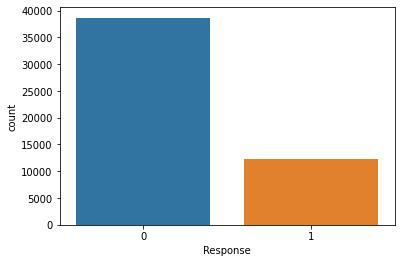

In [12]:
sns.countplot(train.Response)
plt.show()

In [13]:
((train.Response.value_counts())/len(train))*100

0    76.005267
1    23.994733
Name: Response, dtype: float64

76-50
23-50

## Observations:

- The dataset is highly imbalanced.

In [14]:
train.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


## City_Code

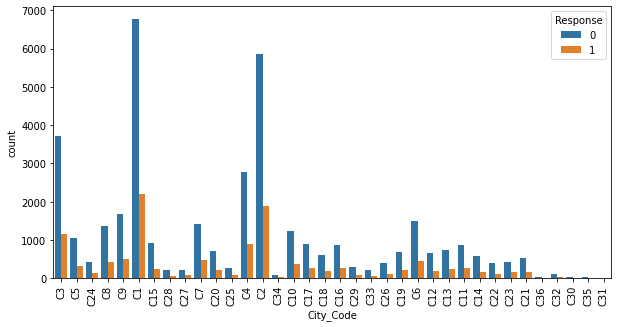

In [15]:
plt.figure(figsize=(10,5))
g=sns.countplot(x=train.City_Code,hue=train.Response)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

## Observations:

- We can see that Cities C1,C2,C3,C4 have more people who reject the insurance offer.

- Out of them C1 has the highest rate of rejection of the offer followed by C2

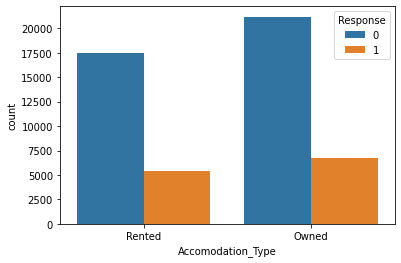

In [16]:
sns.countplot(x=train.Accomodation_Type,hue=train.Response)

In [17]:
train.groupby(by='Accomodation_Type').sum()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Accomodation_Type,,,,,,,
Owned,48104930,1437456,1356564,48274.0,426025,4.549348e+08,6763
Rented,40062825,844921,818075,26442.0,343066,2.667730e+08,5446


## Observations:

- We can see that the people who have their own houses are more likely to reject the insurance offer compared to those staying in an rented house.

- The people who stay in owned house have a slight advantage of accepting the loan compared to the those in rented house.

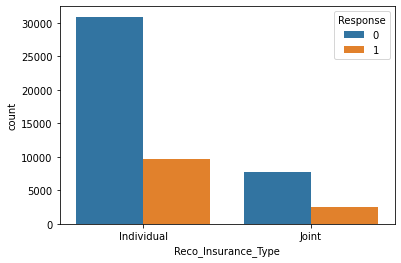

In [18]:
sns.countplot(x=train.Reco_Insurance_Type,hue=train.Response)

##Feature Transformations

In [19]:
l1=[]
for i in train['City_Code']:
  l1.append(int(i.lstrip('C')))
train['City_Code']=l1

In [20]:
train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [21]:
train['Accomodation_Type']=train['Accomodation_Type'].map({'Rented':1,'Owned':2})

In [22]:
train['Reco_Insurance_Type']=train['Reco_Insurance_Type'].map({'Induvidual':1,'Joint':2})

In [23]:

train['Is_Spouse']=train['Is_Spouse'].map({'Yes':1,'No':0})

In [24]:
l3=[]
for i in train['Health Indicator']:
  if type(i)==float:
    l3.append(i)
  else:
    l3.append(int(i.lstrip('X')))
train['Health Indicator']=l3

In [25]:
l4=[]
for i in train['Holding_Policy_Duration']:
  if type(i)==float:
    l4.append(i)
  elif(i=='14+'):
    l4.append(15.0)
  else:
    l4.append(float(i))
train['Holding_Policy_Duration']=l4

In [26]:
def outliers(data,features):
    for c in features:
        Q1=np.percentile(data[c],25)
        Q3=np.percentile(data[c],75)
        IQR=Q3-Q1
        lower_end=Q1-(1.5*IQR)
        upper_end=Q3+(1.5*IQR)
        df_final=data[~(((data[c])<(Q1-(1.5*IQR)))|((data[c])>(Q3+(1.5*IQR))))]
        return df_final


In [27]:
list_columns=list(train.columns)
list_columns.remove('Response')

In [28]:
train.shape

(50882, 13)

In [29]:
train=outliers(train,list_columns)

In [30]:
train.shape

(50141, 13)

In [31]:
df=train.drop('Response',axis=1)

In [32]:
sc=StandardScaler()

In [33]:
df_scaled=sc.fit_transform(df)

In [34]:
Y=train['Response']

In [35]:
from sklearn.impute import KNNImputer

In [36]:
knn_imputer = KNNImputer()

In [37]:
df_scal = knn_imputer.fit_transform(df_scaled)

In [38]:
df_scal

array([[-0.6506449 ,  1.04664203, -1.10658672, ...,  0.54744564,
         1.08499148, -0.39037737],
       [-0.37801271, -0.4303607 ,  0.90367974, ...,  0.35257561,
         1.08499148,  2.47183244],
       [-0.37801271,  1.41236933,  0.90367974, ..., -1.40125461,
         0.61045676, -1.02369549],
       ...,
       [-0.9232771 , -0.9060176 , -1.10658672, ..., -1.40125461,
        -0.4967909 , -0.42887972],
       [-0.9232771 , -1.21466607,  0.90367974, ..., -0.42690449,
         0.13592205,  2.11852037],
       [-0.6506449 ,  1.50679603, -1.10658672, ...,  0.54744564,
         0.45227853, -0.42130052]])

In [39]:
df_scal=pd.DataFrame(df_scal)

In [40]:
df_scal

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.650645,1.046642,-1.106587,0.0,-0.514618,-0.391785,-0.445773,-0.998982,1.858150,0.547446,1.084991,-0.390377
1,-0.378013,-0.430361,0.903680,0.0,1.738657,-1.200120,-0.445773,-0.306941,-0.033418,0.352576,1.084991,2.471832
2,-0.378013,1.412369,0.903680,0.0,-0.745723,-0.622738,-0.445773,-0.445349,-1.084289,-1.401255,0.610457,-1.023695
3,2.211993,1.867591,0.903680,0.0,0.409803,0.301073,-0.445773,-0.998982,1.858150,0.547446,0.610457,0.542168
4,0.030936,0.325758,-1.106587,0.0,-0.052408,0.070120,-0.445773,-0.306941,-0.663940,-1.401255,0.135922,-0.575916
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,-0.514329,-0.622033,-1.106587,0.0,-1.323486,-1.200120,-0.445773,0.385100,-0.748010,0.547446,0.452279,-0.985193
50137,-0.378013,1.733702,-1.106587,0.0,-1.034605,-0.911429,-0.445773,0.385100,0.176756,0.547446,-1.762217,-1.333230
50138,-0.923277,-0.906018,-1.106587,0.0,1.045342,1.167146,-0.445773,-0.306941,1.858150,-1.401255,-0.496791,-0.428880
50139,-0.923277,-1.214666,0.903680,0.0,1.507552,0.358811,-0.445773,-0.306941,-0.874114,-0.426904,0.135922,2.118520


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


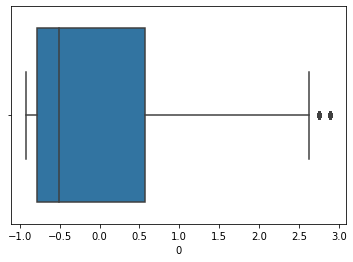

In [41]:
sns.boxplot(df_scal[0])

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,average_precision_score
from xgboost import XGBClassifier

In [44]:
rf=RandomForestClassifier()

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(df_scal,Y,random_state=100)

In [46]:
raf=rf.fit(X_train,Y_train)

In [47]:
Y_pred=raf.predict_proba(X_test)

In [48]:
Y_pred.shape

(12536, 2)

In [49]:
Y_pred=Y_pred[:,1]

In [50]:
roc_auc_score(Y_test,Y_pred)

0.6165422435140571

In [51]:
dt=DecisionTreeClassifier()

In [52]:
dat=dt.fit(X_train,Y_train)

In [53]:
Y_dt_pred=dat.predict(X_test)

In [54]:
accuracy_score(Y_test,Y_dt_pred)

0.6635290363752393

In [55]:
xgboost=XGBClassifier()

In [56]:
xgb=xgboost.fit(X_train,Y_train)

In [57]:
Y_xgb_prob_pred=xgb.predict_proba(X_test)

In [58]:
roc_auc_score(Y_test,Y_xgb_prob_pred[:,1])

0.635338286798797

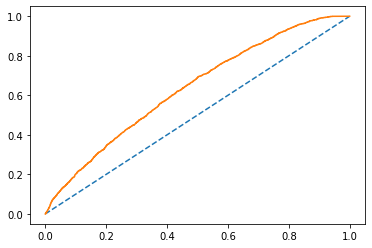

In [59]:
Y_xgb_prob_pred = Y_xgb_prob_pred[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_xgb_prob_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

In [60]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
sm=SMOTE(k_neighbors=7,random_state=10)

In [62]:
X_res1,Y_res1=sm.fit_sample(X_train, Y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
X, y  = undersample.fit_resample(X_res1, Y_res1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
X.shape,y.shape

((56366, 12), (56366,))

In [65]:
X

array([[-0.24169661, -0.39653621,  0.90367974, ...,  0.15770559,
        -1.60403857,  1.13916621],
       [-0.6506449 ,  1.24324688, -1.10658672, ..., -0.42690449,
         0.45227853,  0.27871457],
       [ 1.12146435, -1.20198188, -1.10658672, ..., -1.40125461,
         1.08499148, -0.56682119],
       ...,
       [-0.9232771 , -1.03229443,  0.90367974, ...,  0.54744564,
         0.5826266 ,  0.47397818],
       [-0.03526203, -0.57161092, -1.10658672, ...,  0.45057113,
        -0.10180028, -1.13571042],
       [ 1.06351975, -0.29015937,  0.90367974, ...,  0.54744564,
         1.0737852 ,  1.0835169 ]])

In [66]:
X_res1.shape,Y_res1.shape

((57036, 12), (57036,))

In [67]:
list(Y_res1).count(1),list(Y_res1).count(0)

(28518, 28518)

In [68]:

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [69]:
rf1=RandomForestClassifier()
rf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
Y_rf_pred=rf1.predict_proba(X_test)

In [71]:
roc_auc_score(Y_test,Y_rf_pred[:,1])

0.9069535218295935

In [72]:
{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [73]:
rf2=RandomForestClassifier(min_samples_leaf=2,min_samples_split=10,max_features='sqrt',max_depth=10,bootstrap=True)
rf2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
Y_rf1_pred=rf2.predict_proba(X_test)

In [75]:
roc_auc_score(Y_test,Y_rf1_pred[:,1])

0.8186756155219733

In [76]:
dt1=DecisionTreeClassifier()

In [77]:
dat1=dt1.fit(X_train,Y_train)

In [78]:
Y_dt_pred=dat1.predict_proba(X_test)

In [79]:
roc_auc_score(Y_test,Y_dt_pred[:,1])

0.7603997960756823

In [80]:
xgboost1=XGBClassifier()

In [81]:
xgboost12=xgboost1.fit(X_train,Y_train)

In [82]:
xgboost_dt_pred=xgboost12.predict_proba(X_test)

In [83]:
roc_auc_score(Y_test,xgboost_dt_pred[:,1])

0.8603799612407266

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [84]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }

In [ ]:
gsearch=RandomizedSearchCV(lgb1,param_distributions=param_tuning,cv=3)

In [85]:
import lightgbm as lgb

In [86]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [87]:
lgb_opti=LGBMClassifier(subsample=0.5,n_estimators=500,min_child_weight=5,max_depth=7,learning_rate=0.1,colsample_bytree=0.5)

In [88]:
lgb_opti.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.1, max_depth=7,
               min_child_samples=20, min_child_weight=5, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [89]:
opti_pred=lgb_opti.predict(X_test)

In [90]:
accuracy_score(Y_test,opti_pred),roc_auc_score(Y_test,opti_pred)

(0.8425783560023654, 0.8419305641167509)

Test csv preprocessing

In [91]:
l1=[]
for i in test['City_Code']:
  l1.append(int(i.lstrip('C')))
test['City_Code']=l1


In [92]:
test['Accomodation_Type']=list(map(lambda x:x.replace('Owned','1'),test['Accomodation_Type']))
test['Accomodation_Type']=list(map(lambda x:x.replace('Rented','0'),test['Accomodation_Type']))
test['Accomodation_Type']=list(map(lambda x: int(x),test['Accomodation_Type']))

In [93]:
test['Reco_Insurance_Type']=list(map(lambda x:x.replace('Individual','1'),test['Reco_Insurance_Type']))
test['Reco_Insurance_Type']=list(map(lambda x:x.replace('Joint','0'),test['Reco_Insurance_Type']))
test['Reco_Insurance_Type']=list(map(lambda x: int(x),test['Reco_Insurance_Type']))

In [94]:
test['Is_Spouse']=list(map(lambda x:x.replace('Yes','1'),test['Is_Spouse']))
test['Is_Spouse']=list(map(lambda x:x.replace('No','0'),test['Is_Spouse']))
test['Is_Spouse']=list(map(lambda x: int(x),test['Is_Spouse']))

In [95]:
l=[]
for i in test['Holding_Policy_Duration']:
  if type(i)==float:
    l.append(i)
  elif (i=='14+'):
    l.append(15.0)
  else:
     l.append(float(i))
test['Holding_Policy_Duration']=l

In [96]:
l6=[]
for i in test['Health Indicator']:
  if type(i)==float:
    l6.append(i)
  else:
     l6.append(int(i.lstrip('X')))
test['Health Indicator']=l6

In [97]:
test

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,156,1,1,30,30,0,NaN,6.0,3.0,5,11934.0
1,4,7,1,0,69,68,1,1.0,3.0,3.0,18,32204.8
2,1,564,0,1,28,28,0,3.0,2.0,4.0,17,9240.0
3,3,1177,0,1,23,23,0,3.0,3.0,3.0,18,9086.0
4,1,951,1,1,75,75,0,3.0,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,3,1044,1,1,45,45,0,1.0,4.0,1.0,18,15884.0
21801,4,266,1,1,59,59,0,5.0,6.0,3.0,18,21390.0
21802,12,2470,1,1,74,74,0,3.0,NaN,NaN,1,17836.0
21803,10,1676,0,1,25,25,0,4.0,3.0,1.0,19,11568.0


In [100]:
sc1=sc.transform(test)
df2= knn_imputer.transform(sc1)
x=pd.DataFrame(df2)
k=sub_df['Response']
y_pred=lgb_opti.predict_proba(x)
y_pred=y_pred[:,1]

In [101]:
sub_df=pd.read_csv('/content/drive/MyDrive/batch45/sample_submission_QrCyCoT.csv')

In [102]:
sub_df['Response'].value_counts()

0    21805
Name: Response, dtype: int64

In [104]:
sub_df['Response']=y_pred 
sub_df['ID']=sub_df['ID']

In [105]:
y_pred

array([0.24042535, 0.30394804, 0.24800011, ..., 0.00970111, 0.25009441,
       0.02869359])

In [106]:
pd.DataFrame(sub_df, columns=['ID','Response']).to_csv('/content/drive/MyDrive/batch45/submission_lgboost_pred.csv',index=False)